In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
df_proto_auroc_cp = pd.read_csv('../result_summary3/protonet_cp_result_summary5.csv')
df_multitask_auroc_cp = pd.read_csv('../result_summary3/multitask_cp_result_summary3.csv')
df_maml_auroc_cp = pd.read_csv('../result_summary3/maml_cp_auroc_result_summary2.csv')
df_xgboost_auroc_cp = pd.read_csv('../result_summary3/xgboost_cp_auroc_result_summary.csv')

df_proto_auroc_img = pd.read_csv('../result_summary3/protonet_img_result_summary_4.csv')

In [10]:
auroc_proto_img_16 = np.array([float(df_proto_auroc_img['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_auroc_img))])
auroc_proto_img_32 = np.array([float(df_proto_auroc_img['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_auroc_img))])
auroc_proto_img_64 = np.array([float(df_proto_auroc_img['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_auroc_img))])
auroc_proto_img_96 = np.array([float(df_proto_auroc_img['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_auroc_img))])

auroc_proto_cp_16 = np.array([float(df_proto_auroc_cp['16'][i].split('+/-')[0]) for i in range(len(df_proto_auroc_cp))])
auroc_proto_cp_32 = np.array([float(df_proto_auroc_cp['32'][i].split('+/-')[0]) for i in range(len(df_proto_auroc_cp))])
auroc_proto_cp_64 = np.array([float(df_proto_auroc_cp['64'][i].split('+/-')[0]) for i in range(len(df_proto_auroc_cp))])
auroc_proto_cp_96 = np.array([float(df_proto_auroc_cp['96'][i].split('+/-')[0]) for i in range(len(df_proto_auroc_cp))])

auroc_maml_cp_16 = np.array([float(df_maml_auroc_cp['16'][i].split('+/-')[0]) for i in range(len(df_maml_auroc_cp))])
auroc_maml_cp_32 = np.array([float(df_maml_auroc_cp['32'][i].split('+/-')[0]) for i in range(len(df_maml_auroc_cp))])
auroc_maml_cp_64 = np.array([float(df_maml_auroc_cp['64'][i].split('+/-')[0]) for i in range(len(df_maml_auroc_cp))])
auroc_maml_cp_96 = np.array([float(df_maml_auroc_cp['96'][i].split('+/-')[0]) for i in range(len(df_maml_auroc_cp))])

auroc_multitask_cp_16 = np.array([float(df_multitask_auroc_cp['16'][i].split('+/-')[0]) for i in range(len(df_multitask_auroc_cp))])
auroc_multitask_cp_32 = np.array([float(df_multitask_auroc_cp['32'][i].split('+/-')[0]) for i in range(len(df_multitask_auroc_cp))])
auroc_multitask_cp_64 = np.array([float(df_multitask_auroc_cp['64'][i].split('+/-')[0]) for i in range(len(df_multitask_auroc_cp))])
auroc_multitask_cp_96 = np.array([float(df_multitask_auroc_cp['96'][i].split('+/-')[0]) for i in range(len(df_multitask_auroc_cp))])

auroc_xgboost_cp_16 = np.array([float(df_xgboost_auroc_cp['16'][i].split('+/-')[0]) for i in range(len(df_xgboost_auroc_cp))])
auroc_xgboost_cp_32 = np.array([float(df_xgboost_auroc_cp['32'][i].split('+/-')[0]) for i in range(len(df_xgboost_auroc_cp))])
auroc_xgboost_cp_64 = np.array([float(df_xgboost_auroc_cp['64'][i].split('+/-')[0]) for i in range(len(df_xgboost_auroc_cp))])
auroc_xgboost_cp_96 = np.array([float(df_xgboost_auroc_cp['96'][i].split('+/-')[0]) for i in range(len(df_xgboost_auroc_cp))])


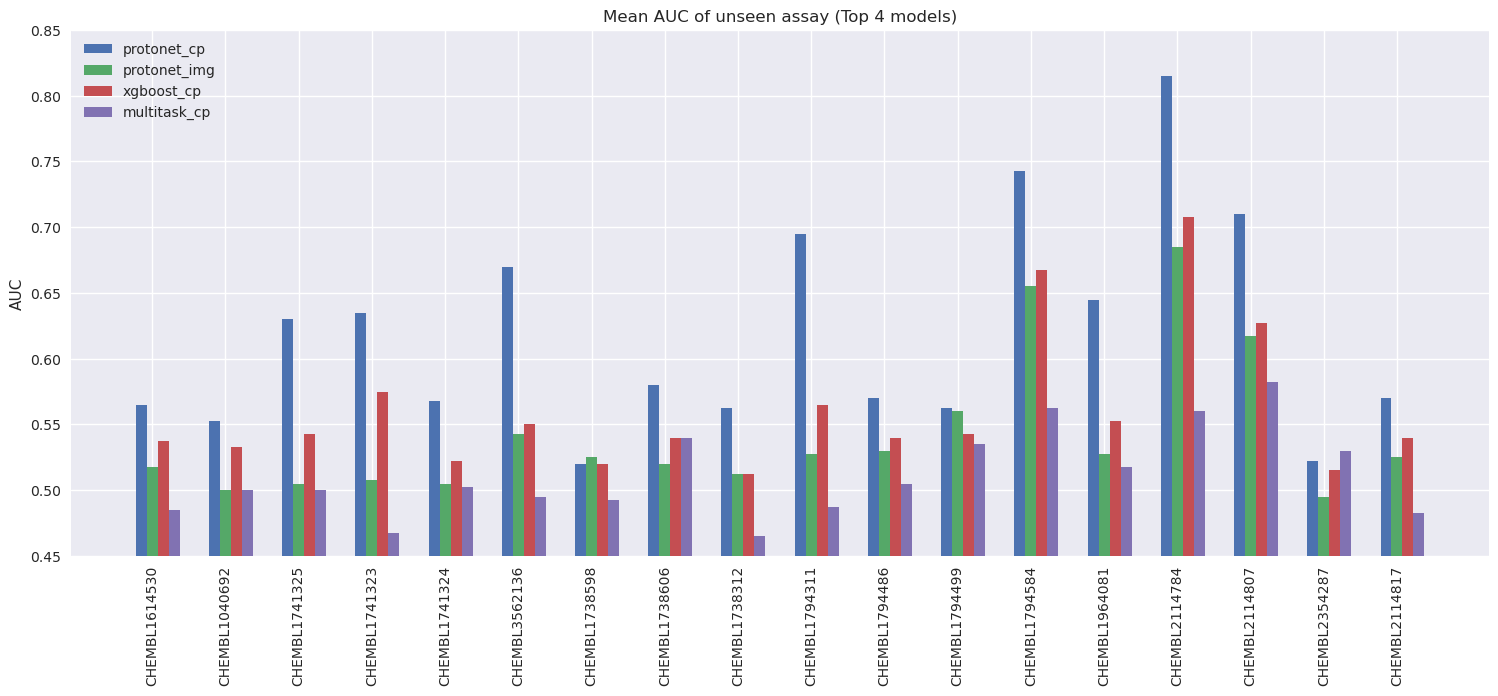

In [11]:
# Avg score of each method for each assay
avg_proto_cp = np.mean([auroc_proto_cp_16, auroc_proto_cp_32, auroc_proto_cp_64, auroc_proto_cp_96], axis=0)
avg_proto_img = np.mean([auroc_proto_img_16, auroc_proto_img_32, auroc_proto_img_64, auroc_proto_img_96], axis=0)
avg_multitask_cp = np.mean([auroc_multitask_cp_16, auroc_multitask_cp_32, auroc_multitask_cp_64, auroc_multitask_cp_96], axis=0)
avg_maml_cp = np.mean([auroc_maml_cp_16, auroc_maml_cp_32, auroc_maml_cp_64, auroc_maml_cp_96], axis=0)
avg_xgboost_cp = np.mean([auroc_xgboost_cp_16, auroc_xgboost_cp_32, auroc_xgboost_cp_64, auroc_xgboost_cp_96], axis=0)
labels = list(df_proto_auroc_cp['assay_chembl_id'])

with plt.style.context(['seaborn-v0_8-deep', 'seaborn']):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    #rects1 = ax.bar(x - width, avg_maml_cp, width, label='maml')
    rects2 = ax.bar(x-width, avg_proto_cp, width, label='protonet_cp')
    rects3 = ax.bar(x, avg_proto_img, width, label='protonet_img')
    rects4 = ax.bar(x + width, avg_xgboost_cp, width, label='xgboost_cp')
    rects5 = ax.bar(x + 2*width, avg_multitask_cp, width, label='multitask_cp')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUC')
    ax.set_title('Mean AUC of unseen assay (Top 4 models)')
    ax.set_xticks(x, labels)
    ax.legend(loc='upper left')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.tick_params(axis='x', labelrotation=90)

    plt.ylim([0.45, 0.85])
    plt.savefig("../plots/Model_comparison_barplot1.png", bbox_inches='tight')
    plt.show()

In [12]:
# Best performing:
### CHEMBL3562136: PubChem BioAssay. qHTS Assay for Identifying Compounds that block Entry of Ebola Virus, Screen 2 blue channel. 
### CHEMBL2114807: PubChem BioAssay. qHTS Assay to Identify Small Molecule Activators of BRCA1 Expression.
### CHEMBL2114784: PubChem BioAssay. qHTS for Inhibitors of ATXN expression.
### CHEMBL1964081: PUBCHEM_BIOASSAY: S16 Schwann cell PMP22 intronic element firefly luciferase assay.
### CHEMBL1794584: PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b
### CHEMBL1794311: PUBCHEM_BIOASSAY: Inhibitors of the vitamin D receptor (VDR): qHTS. (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID504855]

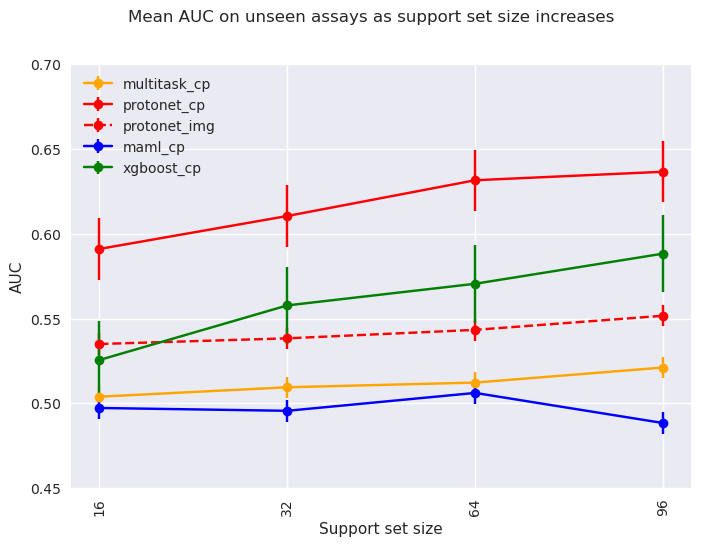

In [13]:
avg_protonet_cp = [np.mean(auroc_proto_cp_16), np.mean(auroc_proto_cp_32), np.mean(auroc_proto_cp_64), np.mean(auroc_proto_cp_96)]
avg_protonet_img = [np.mean(auroc_proto_img_16), np.mean(auroc_proto_img_32), np.mean(auroc_proto_img_64), np.mean(auroc_proto_img_96)]
avg_multitask_cp = [np.mean(auroc_multitask_cp_16), np.mean(auroc_multitask_cp_32), np.mean(auroc_multitask_cp_64), np.mean(auroc_multitask_cp_96)]
avg_maml_cp = [np.mean(auroc_maml_cp_16), np.mean(auroc_maml_cp_32), np.mean(auroc_maml_cp_64), np.mean(auroc_maml_cp_96)]
avg_xgboost_cp = [np.mean(auroc_xgboost_cp_16), np.mean(auroc_xgboost_cp_32), np.mean(auroc_xgboost_cp_64), np.mean(auroc_xgboost_cp_96)]

labels = ['16', '32', '64', '96']

with plt.style.context(['seaborn-v0_8-deep', 'seaborn']):
    plt.errorbar(labels, avg_multitask_cp, yerr=np.std(avg_multitask_cp), color='orange', label='multitask_cp', marker='o')
    plt.errorbar(labels, avg_protonet_cp, yerr=np.std(avg_protonet_cp), color='red', label='protonet_cp', marker='o')
    plt.errorbar(labels, avg_protonet_img, yerr=np.std(avg_protonet_img), color='red', linestyle='dashed', label='protonet_img', marker='o')
    plt.errorbar(labels, avg_maml_cp, yerr=np.std(avg_maml_cp), color='blue', label='maml_cp', marker='o')
    plt.errorbar(labels, avg_xgboost_cp, yerr=np.std(avg_xgboost_cp), color='green', label='xgboost_cp', marker='o')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('AUC')
    plt.xlabel('Support set size')
    plt.suptitle('Mean AUC on unseen assays as support set size increases')
    #plt.xticks([])
    plt.legend(loc='upper left')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.tick_params(axis='x', labelrotation=90)

    plt.ylim([0.45, 0.70])
    plt.savefig("../plots/Model_comparison_lineplot1.png")
    plt.show()

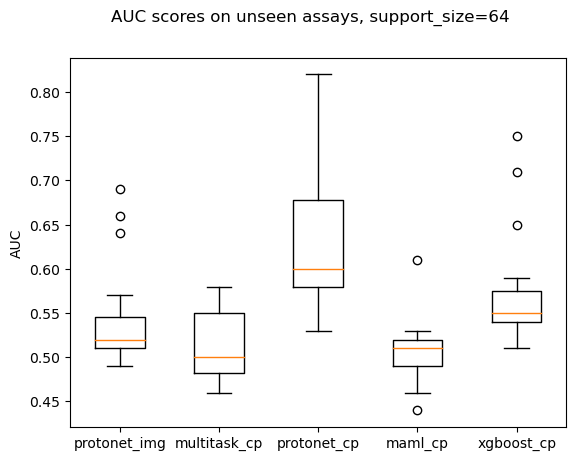

In [14]:
data = [auroc_proto_img_64, auroc_multitask_cp_64, auroc_proto_cp_64, auroc_maml_cp_64, auroc_xgboost_cp_64]
#data = [multitask_cp_plus_64, proto_cp_plus_after_64, proto_img_after_64, cloome_img_64]

plt.boxplot(data)
plt.ylabel('AUC')
plt.suptitle('AUC scores on unseen assays, support_size=64')
#plt.xticks([1,2,3,4], ['multitask_cp+', 'protonet_cp+', 'protonet_img', 'cloome_img'])
plt.xticks([1,2,3,4, 5], ['protonet_img', 'multitask_cp', 'protonet_cp', 'maml_cp', 'xgboost_cp'])
plt.savefig("../plots/Model_comparison_boxplot1.png")
plt.show()